In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display, HTML
from PIL import Image

print(cv.__version__)

4.8.0


# **RGB to HSI Function** 

In [32]:
# def convert_RGB_to_HSI(image):
#     width, height, channel = image.shape
#     converted_image = np.zeros((width, height, channel), dtype=np.float64)

#     for i in range(width):
#         for j in range(height):
            
#             red_channel, green_channel, blue_channel = image[i, j, 2], image[i, j, 1], image[i, j, 0]
#             red_channel, green_channel, blue_channel = red_channel / 255.0, green_channel / 255.0, blue_channel / 255.0
            
#             # I
#             intensity = max(blue_channel, green_channel, red_channel)
#             delta = intensity - min(blue_channel, green_channel, red_channel)
            
#             if intensity == 0:
#                 saturation = 0
#                 hue = 0
#             elif delta == 0:
#                 saturation = 0
#                 hue = 0
#             else:
#                 # S
#                 saturation = delta/intensity
                
#                 # H
#                 hue = 0
#                 if(intensity == red_channel):
#                     hue = (1/6) * ((green_channel - blue_channel) / delta)
#                 elif(intensity == green_channel):
#                     hue = (1/6) *  (2 + ((blue_channel - green_channel) / delta))
#                 elif(intensity == blue_channel):
#                     hue = (1/6) *  (4 + ((red_channel - green_channel) / delta))
                    
#                 converted_image[i, j] = [hue, saturation, intensity]
            
#     return converted_image

# def complementary_hsi(image):
#     complementary_image = image.copy()

#     h, s, i = complementary_image[:, :, 0], complementary_image[:, :, 1], complementary_image[:, :, 2]
#     h = (h + 0.5) % 1.0
    
#     cv.imwrite('./edited_image/fruit_complemented_hsi.jpg', cv.cvtColor(complementary_image, cv.COLOR_RGB2BGR))
    
#     return complementary_image

# **Complementary Function**    

In [84]:
def complementary_rgb(image):
    # split and complement every color channel
    blue_channel, green_channel, red_channel = cv.split(image)
    
    blue_channel = cv.bitwise_not(blue_channel)
    green_channel = cv.bitwise_not(green_channel)
    red_channel = cv.bitwise_not(red_channel)
    
    # merge them back
    complemented_image = cv.merge([blue_channel, green_channel, red_channel])
    complemented_image_bgr = cv.cvtColor(complemented_image, cv.COLOR_RGB2BGR)
    cv.imwrite('./edited_image/fruit_complemented_rgb.jpg', complemented_image_bgr)
    
    return complemented_image

def complementary_hsi(image):
    # Convert the HSI image to a floating-point representation for calculations

    image_hsi = image.astype(np.float32) / 255.0

    # Extract the hue, saturation, and intensity channels
    hue, saturation, intensity = cv.split(image_hsi)

    # Calculate the complementary hue by subtracting the hue from the maximum hue value (2π)
    complementary_hue = (2 * np.pi - hue) % (2 * np.pi)

    # Reconstruct the HSI image with the complementary hue
    complementary_image_hsi = cv.merge([complementary_hue, saturation, intensity])
    
    # # Convert the normalized image back to the original range [0, 255]
    # image_restored = (complementary_image_hsi * 255).astype(np.uint8)
    
 
    cv.imwrite('./edited_image/fruit_complemented_hsi.jpg', complementary_image_hsi)
    
    return complementary_image_hsi

# **Complementary for RGB and HSI space**    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


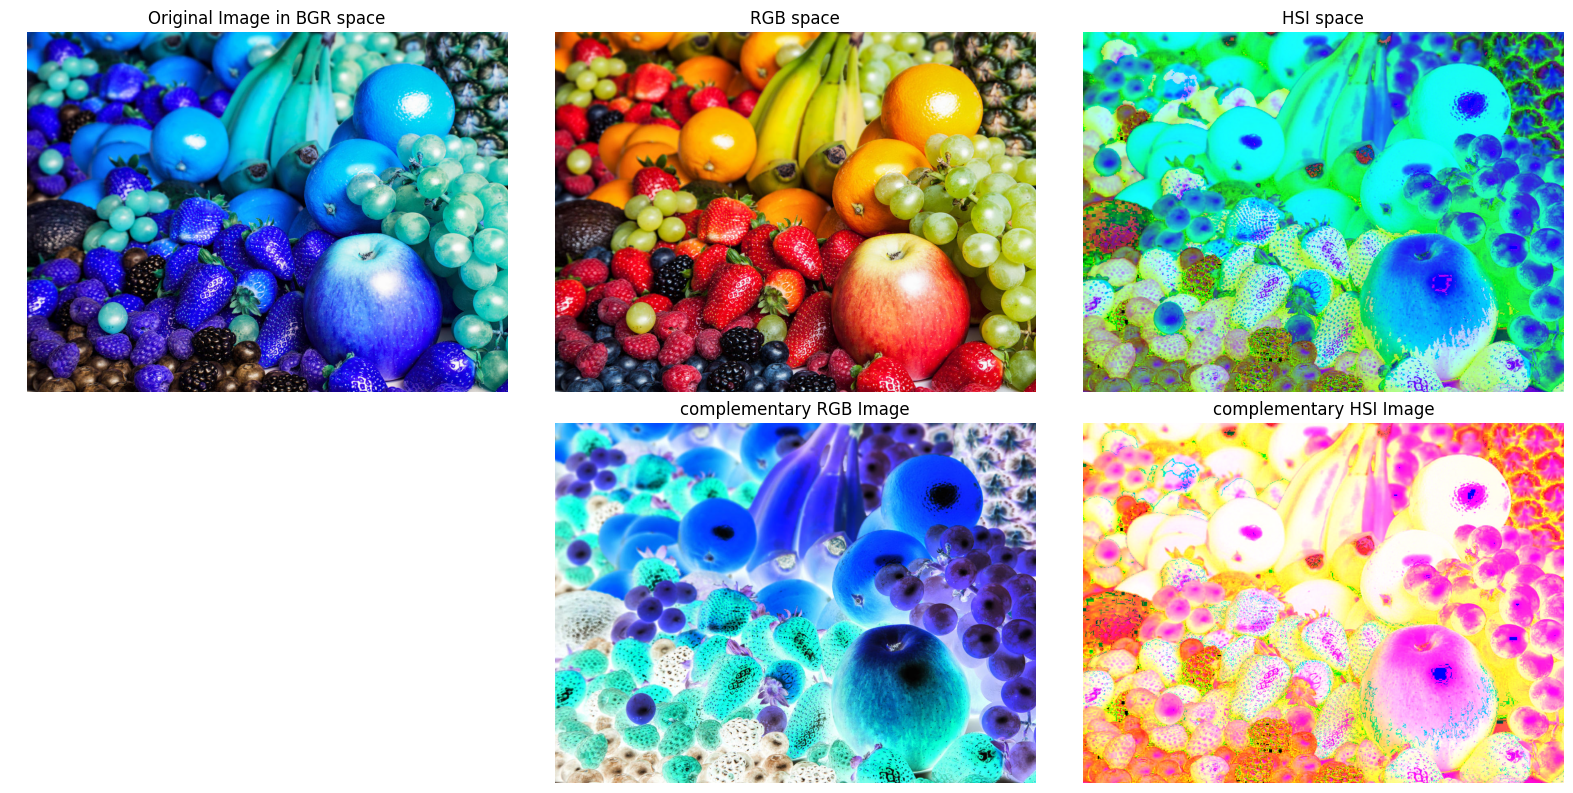

In [85]:
image = cv.imread('./original_image/fruit.jpg')

image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_hsi = cv.cvtColor(image, cv.COLOR_BGR2HSV)

complementary_image_rgb = complementary_rgb(image_rgb)
complementary_image_hsi = complementary_hsi(image_hsi)

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# Display each image in a subplot
axes[0, 0].imshow(image)
axes[0, 0].set_title('Original Image in BGR space')
axes[0, 0].axis('off')

axes[0, 1].imshow(image_rgb)
axes[0, 1].set_title('RGB space')
axes[0, 1].axis('off')

axes[0, 2].imshow(image_hsi)
axes[0, 2].set_title('HSI space')
axes[0, 2].axis('off')

axes[1, 0].set_title('')
axes[1, 0].axis('off')

axes[1, 1].imshow(complementary_image_rgb)
axes[1, 1].set_title('complementary RGB Image')
axes[1, 1].axis('off')

axes[1, 2].imshow(complementary_image_hsi)
axes[1, 2].set_title('complementary HSI Image')
axes[1, 2].axis('off')
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

>#####  **จะเห็นได้ว่าภาพ Complementary ของ RGB และ HSI มีความแตกต่างกันพอสมควรเนื่องจากภาพที่ได้จากการแปลงเป็น RGB และ HSI ก็แตกต่างกันตั้งแต่แรกแล้ว**

# **Color Slicing for orange**    

In [2]:
def colorSlicing(img, target_color, colorRange):

    r_range, g_range, b_range = colorRange
    r_target_color, g_target_color, b_target_color = target_color

    width, height, channel = img.shape
    
    new_image = np.zeros((width, height, channel), dtype=np.uint8)

    for i in range(width):
        for j in range(height):
            r, g, b = img[i, j]

            diff_r = abs(r - r_target_color)
            diff_g = abs(g - g_target_color)
            diff_b = abs(b - b_target_color)

            if diff_r <= r_range and diff_g <= g_range and diff_b <= b_range:
                new_image[i, j] = [r, g, b]
            else:
                new_image[i, j] = [0, 0, 128]
                
    cv.imwrite('./edited_image/fruit_complemented_hsi.jpg', new_image)
    
    return new_image

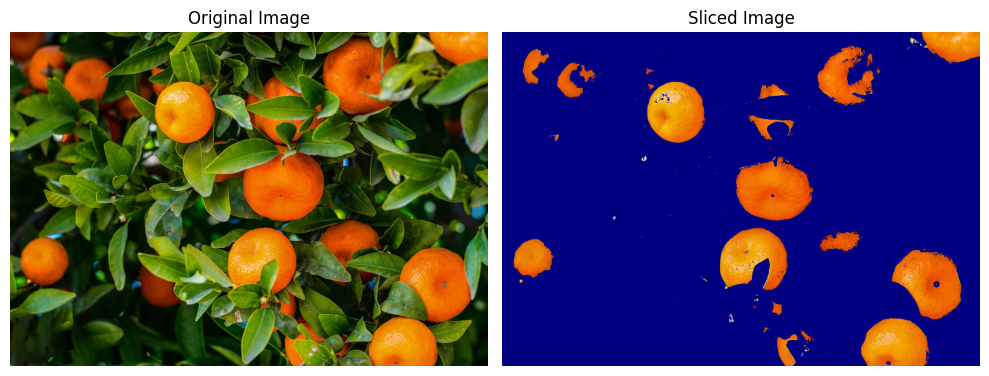

In [13]:
image = cv.imread('./original_image/oranges.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# median value of orange color
orangeColor = (230, 100, 0)

# satisfying range
# diff of red channel shouldn't be greater than 25
# diff of green channel shouldn't be greater than 110
# diff of blue channel can be any since its not main component of orange color
orangeRange = (25, 110, 255)

orange_sliced = colorSlicing(image_rgb, orangeColor, orangeRange)

# cv.imwrite("output/5_2/orange_sliced_rgb.png", cv.cvtColor(orange_sliced, cv.COLOR_RGB2BGR))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display each image in a subplot
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(orange_sliced)
axes[1].set_title('Sliced Image')
axes[1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

>#####  **จะเห็นได้ว่าภาพสามารถ slice ส้มออกมาได้ค่อนข้างมากยกเว้นบริเวณที่ส้มมีความดำมากๆหรืออยู่ไกลออกไป (เบลอ) อาจจะปรับ parameter ให้รองรับส้มที่สีไม่ชัดเจนได้ดีกว่านี้ หรือ อาจจะใช้ HSI เป็น space ในการทำ slicing แทน แต่รวมๆแล้ว parameter ที่ตั้งไว้สามารถแสดงผลได้โอเค เพราะ ไม่ติดสีอื่นที่ไม่ต้องการมาเลย**